Import packages

In [261]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from random import sample
import random
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.metrics import recall_score, precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

Read DataBase

In [5]:
df = pd.read_csv('creditcard.csv')

Analyse Data

In [6]:
df.describe(include='all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# no missing data

In [8]:
df = df.drop('Time', axis=1)

In [29]:
print(f"nb_fraud= {df.loc[df.Class == 1, 'Class'].count()}")
print(f"nb_no_fraud= {df.loc[df.Class == 0, 'Class'].count()}")

nb_fraud= 492
nb_no_fraud= 284315


In [ ]:
# Unbalanced Data

In [58]:
df_normalized = normalize(df.drop('Class', axis=1), norm='l2')
fraud_indexes = df.index[df['Class'] == 1].tolist()
no_fraud_indexes = df.index[df['Class'] == 0].tolist()
df_normalized[fraud_indexes, :].mean(axis=0) - df_normalized[no_fraud_indexes, :].mean(axis=0)

array([-0.09354187,  0.05951943, -0.16148387,  0.14534772, -0.04724729,
       -0.02968835, -0.12318649,  0.00052426, -0.07495609, -0.13318595,
        0.10743136, -0.1748399 , -0.00874685, -0.22301171, -0.01355475,
       -0.09235904, -0.11824525, -0.02938003, -0.00102097,  0.01166285,
        0.02155655,  0.00545165, -0.00439265, -0.00564209,  0.00624423,
        0.00125093,  0.00581858,  0.00437677, -0.30545605])

In [ ]:
# V1, V3, V4, V7, V10, V11, V12, V14, V16, V17, Amount to be checked

Visualization

In [23]:
pca = PCA(n_components=2)
pca.fit(df_normalized)
df_reducted = pca.transform(df_normalized)

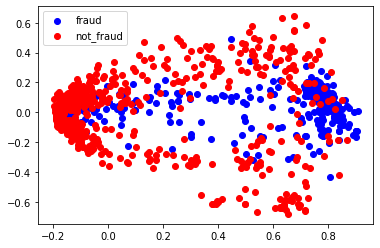

In [49]:
fraud_indexes = df.index[df['Class'] == 1].tolist()
no_fraud_indexes = sample(df.index[df['Class'] == 0].tolist(), 1000)
plt.scatter(df_reducted[fraud_indexes, 0], df_reducted[fraud_indexes, 1], c='b', label='fraud')
plt.scatter(df_reducted[no_fraud_indexes, 0], df_reducted[no_fraud_indexes, 1], c='r', label='not_fraud')
plt.legend()

In [ ]:
# Detection

In [ ]:
# normal distribution

In [211]:
# Separate DataBase
fraud_indexes = df.index[df['Class'] == 1].tolist()
no_fraud_indexes = df.index[df['Class'] == 0].tolist()
random.shuffle(fraud_indexes)
random.shuffle(no_fraud_indexes)
train_indexes = no_fraud_indexes[:-len(fraud_indexes)]
validation_indexes = no_fraud_indexes[-len(fraud_indexes):int(-len(fraud_indexes) / 2)] + fraud_indexes[
                                                                                          :int(len(fraud_indexes) / 2)]
test_indexes = no_fraud_indexes[int(-len(fraud_indexes) / 2):] + fraud_indexes[int(len(fraud_indexes) / 2):]

In [212]:
X_train = df_normalized[train_indexes]
y_train = df.loc[train_indexes, 'Class']
X_validation = df_normalized[validation_indexes]
y_validation = df.loc[validation_indexes, 'Class']
X_test = df_normalized[test_indexes]
y_test = df.loc[test_indexes, 'Class']

In [213]:
def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

In [214]:
def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

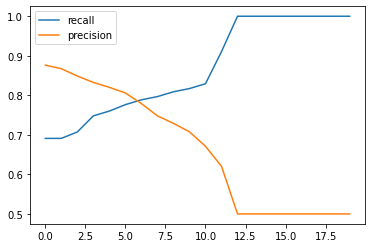

In [244]:
mu, sigma = estimate_gaussian(X_train)
no_fraud_proba_validation = multivariate_gaussian(X_validation, mu, sigma)
plt.plot([k for k in range(20)],
         [recall_score(y_validation, (no_fraud_proba_validation < 100 ** k).astype(int)) for k in range(20)],
         label='recall')
plt.plot([k for k in range(20)],
         [precision_score(y_validation, (no_fraud_proba_validation < 100 ** k).astype(int)) for k in range(20)],
         label='precision')
plt.legend()

In [249]:
no_fraud_proba_test = multivariate_gaussian(X_test, mu, sigma)
prediction_test = (no_fraud_proba_test < 100 ** 10).astype(int)
print(f'recall score= {recall_score(y_test, prediction_test)}')
print(f'precision score= {precision_score(y_test, prediction_test)}')

recall score= 0.8821138211382114
precision score= 0.6845425867507886


In [ ]:
# neural network

In [275]:
# Separate DataBase
fraud_indexes = df.index[df['Class'] == 1].tolist()
no_fraud_indexes = df.index[df['Class'] == 0].tolist()
random.shuffle(fraud_indexes)
random.shuffle(no_fraud_indexes)
under_no_fraud_indexes = no_fraud_indexes[:len(fraud_indexes)]
total_used_indexes = fraud_indexes + under_no_fraud_indexes

X_train, X_test, y_train, y_test = train_test_split(df_normalized[total_used_indexes],
                                                    df.loc[total_used_indexes, 'Class'], test_size=0.2, random_state=0)

In [276]:
MLPC = MLPClassifier(hidden_layer_sizes=(250,), max_iter=10000)

In [277]:
MLPC.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(250,), max_iter=10000)

In [278]:
y_pred = MLPC.predict(X_test)
print(f'recall score= {recall_score(y_test, y_pred)}')
print(f'precision score= {precision_score(y_test, y_pred)}')

recall score= 0.9120879120879121
precision score= 0.9431818181818182
